# Stereochemistry of Phosgenation Transition States # 

In [1]:
import rdkit.Chem as Chem

from stereomolgraph.graph import StereoCondensedReactionGraph, Tetrahedral
from stereomolgraph.experimental import generate_fleeting_stereoisomers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from stereomolgraph.ipython import View2D

View2D.show_atom_numbers = True
View2D.generate_bond_orders = True
View2D.height = 300
View2D.width = 1000

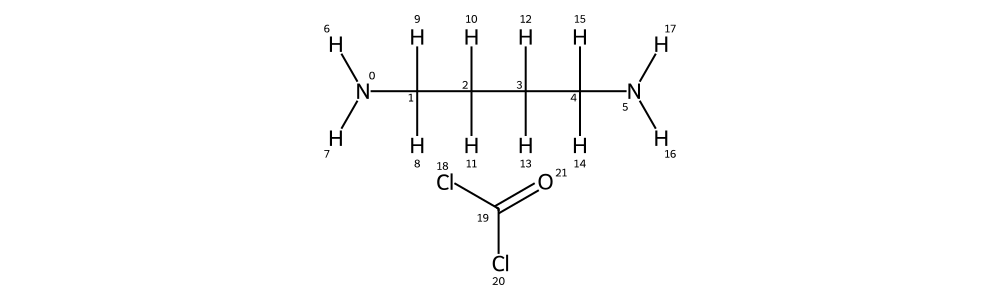

In [2]:
tmda_rdmol = Chem.AddHs(Chem.MolFromSmiles("NCCCCN"))
phosgene_rdmol = Chem.AddHs(Chem.MolFromSmiles("ClC(Cl)=O"))

scrg1 = StereoCondensedReactionGraph.from_rdmol(Chem.CombineMols(tmda_rdmol, phosgene_rdmol))
scrg1

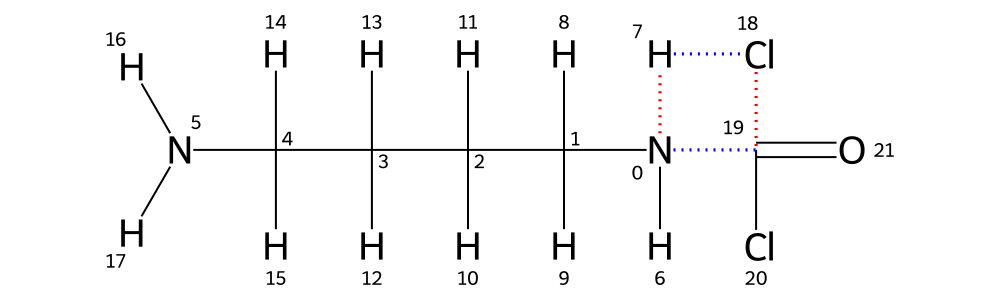

In [3]:
scrg1.add_formed_bond(0, 19)
scrg1.add_formed_bond(18, 7)
scrg1.add_broken_bond(18, 19)
scrg1.add_broken_bond(0, 7)
scrg1

In [4]:
n_neighbors = scrg1.bonded_to(0)
c_neighbors = scrg1.bonded_to(19)
scrg1.set_atom_stereo_change(0, fleeting=Tetrahedral(atoms=(0, *n_neighbors), parity=None))
scrg1.set_atom_stereo_change(19, fleeting=Tetrahedral(atoms=(19, *c_neighbors), parity=None))

4

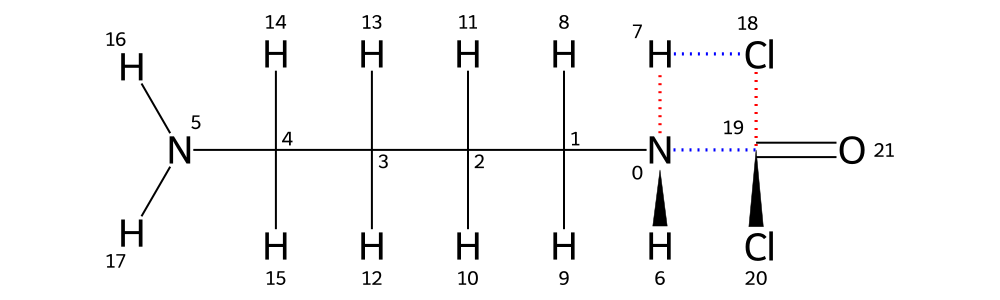

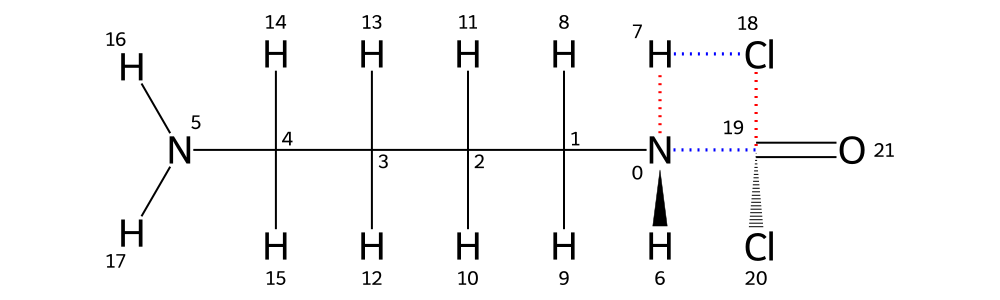

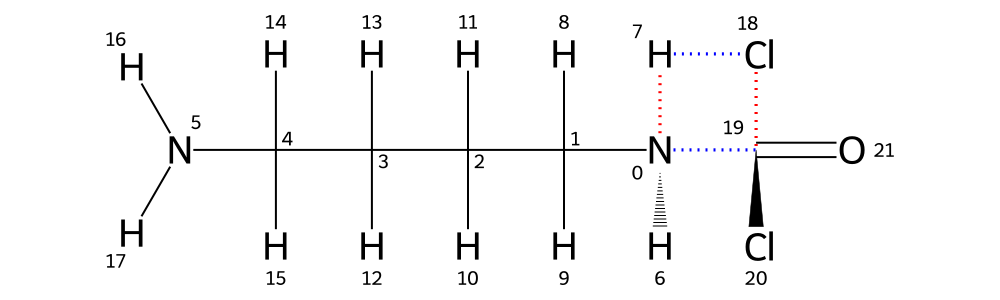

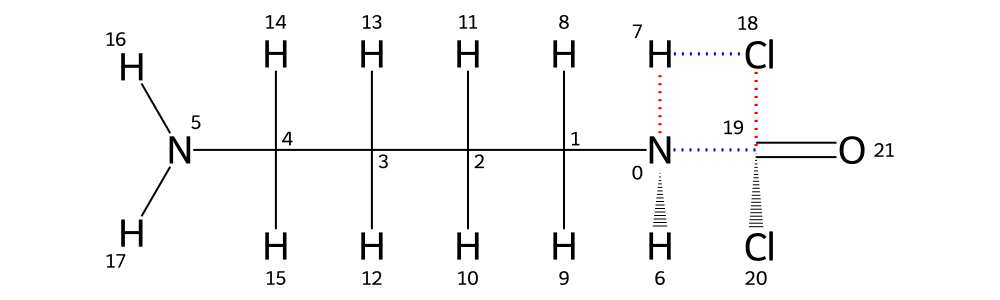

In [5]:
isomers = generate_fleeting_stereoisomers(scrg1)
len(isomers)
for iso in isomers:
    iso

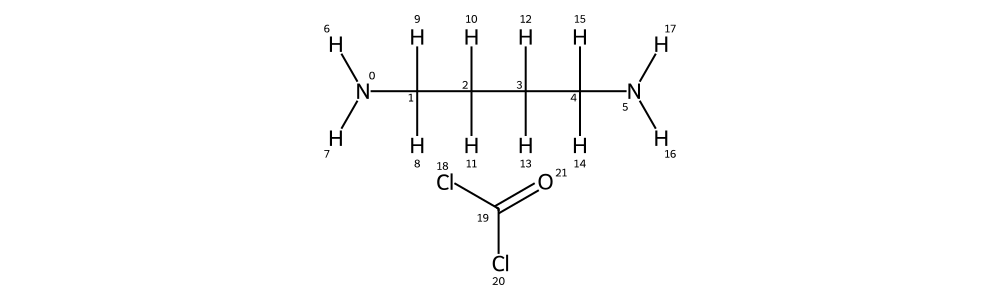

In [6]:
scrg2 = StereoCondensedReactionGraph.from_rdmol(Chem.CombineMols(tmda_rdmol, phosgene_rdmol))
scrg2

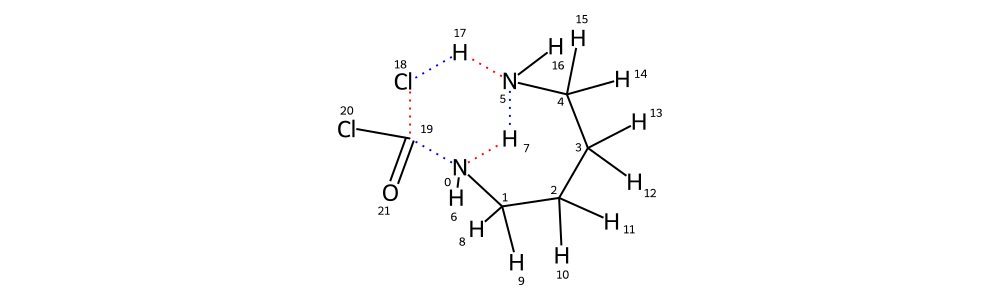

In [7]:
scrg2.add_formed_bond(0, 19)
scrg2.add_formed_bond(18, 17)
scrg2.add_formed_bond(5, 7)

scrg2.add_broken_bond(18, 19)
scrg2.add_broken_bond(5, 17)
scrg2.add_broken_bond(0, 7)
scrg2

In [8]:
scrg2.set_atom_stereo_change(5, fleeting=Tetrahedral(atoms=(5, *scrg2.bonded_to(5))))
scrg2.set_atom_stereo_change(0, fleeting=Tetrahedral(atoms=(0, *scrg2.bonded_to(0))))
scrg2.set_atom_stereo_change(19, fleeting=Tetrahedral(atoms=(19, *scrg2.bonded_to(19))))

8

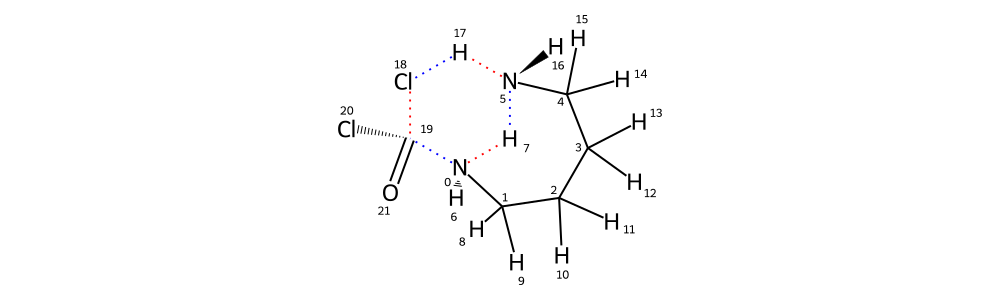

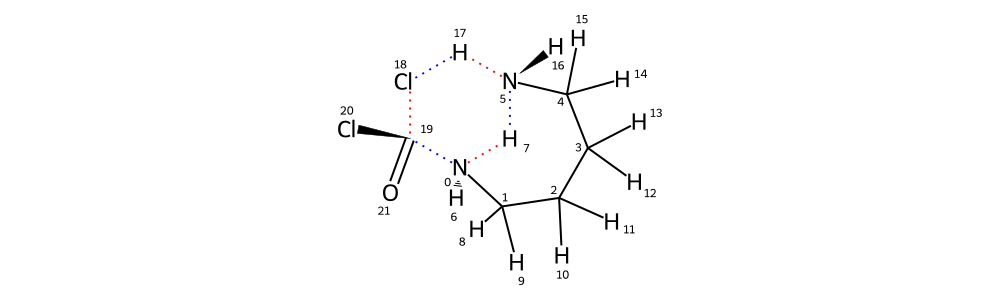

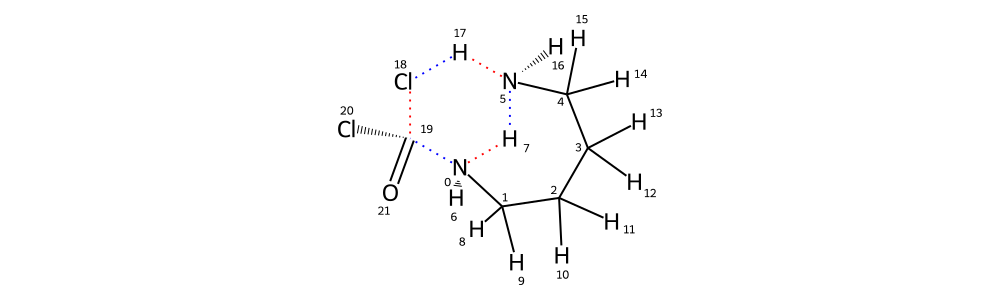

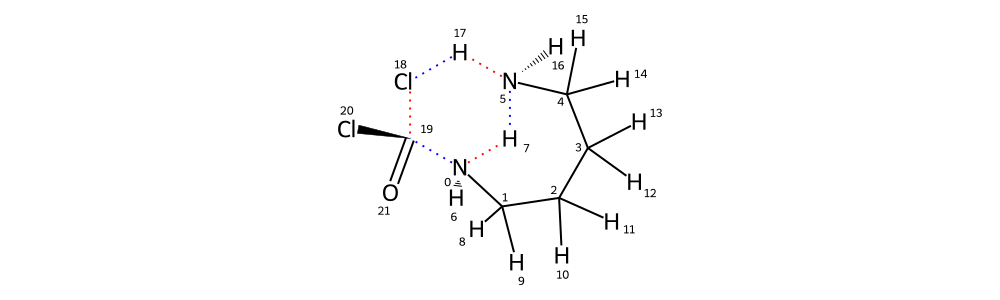

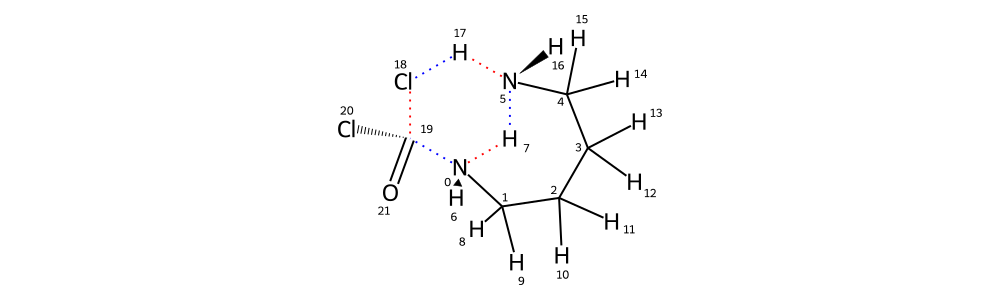

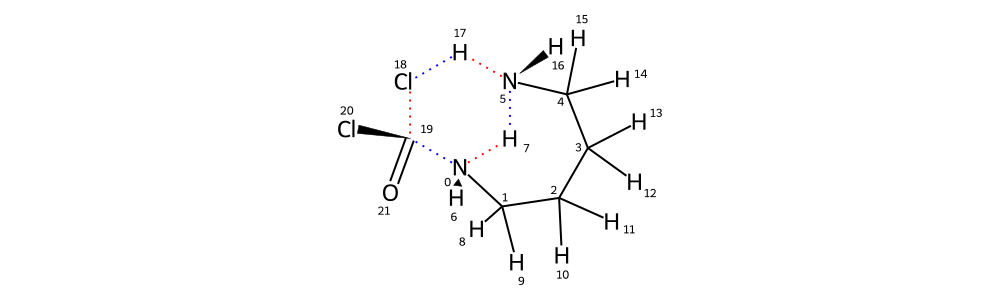

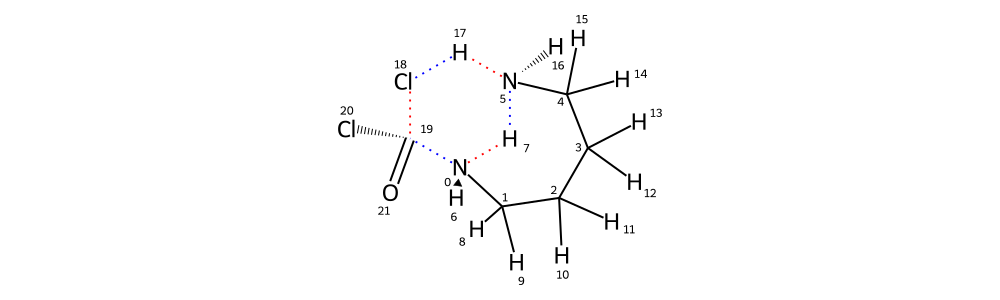

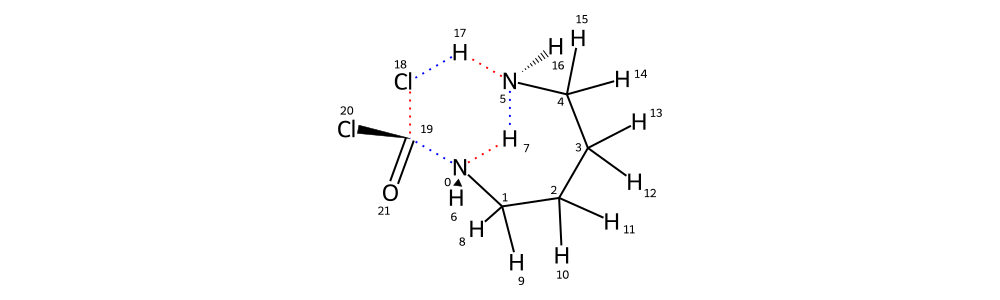

In [9]:
isomers2 = generate_fleeting_stereoisomers(scrg2, enantiomers=True)
len(isomers2)

for iso in isomers2:
    iso